In [ ]:
!pip install torchviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4147 sha256=611020cb53d0e4966cbc05deb7815bb9a4d3f7f74f52378fff43c48a510c617a
  Stored in directory: /root/.cache/pip/wheels/29/65/6e/db2515eb1dc760fecd36b40d54df65c1e18534013f1c037e2e
Successfully built torchviz


In [ ]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np 
import pandas as pd
import torchvision
import matplotlib.pyplot as plt
from PIL import Image
from torchviz import make_dot
import shutil
import random
from torchvision import transforms
import cv2
from skimage.metrics import structural_similarity as ssim

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
!unzip '/content/archive.zip' -d '/content/test-tiny'

Streaming output truncated to the last 5000 lines.
  inflating: /content/test-tiny/tiny-imagenet-200/val/images/val_5500.JPEG  
  inflating: /content/test-tiny/tiny-imagenet-200/val/images/val_5501.JPEG  
  inflating: /content/test-tiny/tiny-imagenet-200/val/images/val_5502.JPEG  
  inflating: /content/test-tiny/tiny-imagenet-200/val/images/val_5503.JPEG  
  inflating: /content/test-tiny/tiny-imagenet-200/val/images/val_5504.JPEG  
  inflating: /content/test-tiny/tiny-imagenet-200/val/images/val_5505.JPEG  
  inflating: /content/test-tiny/tiny-imagenet-200/val/images/val_5506.JPEG  
  inflating: /content/test-tiny/tiny-imagenet-200/val/images/val_5507.JPEG  
  inflating: /content/test-tiny/tiny-imagenet-200/val/images/val_5508.JPEG  
  inflating: /content/test-tiny/tiny-imagenet-200/val/images/val_5509.JPEG  
  inflating: /content/test-tiny/tiny-imagenet-200/val/images/val_551.JPEG  
  inflating: /content/test-tiny/tiny-imagenet-200/val/images/val_5510.JPEG  
  inflating: /content/test

In [ ]:
dataset_dir = '/content/'
dataset_folder = '/content/test-tiny'
dataset_path = os.path.join(dataset_dir,dataset_folder)
training_folder_dir = '/content/test-tiny/tiny-imagenet-200/train'

def delete_image(image_path): 
    if '.txt' in image_path:
        os.remove(image_path)
        return 
       
    img = Image.open(image_path)
    img_shape = transforms.ToTensor()(img).size()
    if img_shape[0] == 1:
        os.remove(image_path)
        return 1
    else:
        return 0
if not os.path.exists(dataset_path):
    os.makedirs(dataset_path)


for i,folder in enumerate(os.listdir(training_folder_dir)):
    
    files =  os.listdir(os.path.join(training_folder_dir,folder,'images'))
    deleted_files = []

    for _file in files:
        d = delete_image(os.path.join(training_folder_dir,folder,'images',_file))
        if d:
          deleted_files.append(_file)
    
    files = list(set(files) - set(deleted_files))

    selected_files = random.sample(files, 14)
    validation_images,train_images = selected_files[:4],selected_files[4:]
    for image in train_images:
        print(image)
        shutil.copy2("/content/test-tiny/tiny-imagenet-200/tiny-imagenet-200/train/"+folder+"/images/"+image,'/content/test_tiny/train/images/')
    for image in validation_images:
        shutil.copy2("/content/test-tiny/tiny-imagenet-200/tiny-imagenet-200/train/"+folder+"/images/"+image,'/content/test_tiny/val/images/')


training_images = os.listdir('/content/test_tiny/train/images/')
random.shuffle(training_images)

cover_images = training_images[:500]
secret_images_1 = training_images[500:1000]
secret_images_2 = training_images[1000:1500]
secret_images_3 = training_images[1500:]

dataset = []
for i in range(500):
    dataset.append({
        'cover_image':cover_images[i],
        'secret_image_1':secret_images_1[i],
        'secret_image_2':secret_images_2[i],
        'secret_image_3':secret_images_3[i]
    })

dataframe = pd.DataFrame(dataset)
dataframe.to_csv('./train_dataset.csv')

validation_images = os.listdir('/content/test_tiny/val/images/')
random.shuffle(validation_images)

cover_images = validation_images[:200]
secret_images_1 = validation_images[200:400]
secret_images_2 = validation_images[400:600]
secret_images_3 = validation_images[600:]

dataset = []
for i in range(200):
    dataset.append({
        'cover_image':cover_images[i],
        'secret_image_1':secret_images_1[i],
        'secret_image_2':secret_images_2[i],
        'secret_image_3':secret_images_3[i]
    })

dataframe = pd.DataFrame(dataset)
dataframe.to_csv('./validation_dataset.csv')

n02814860_376.JPEG
n02814860_338.JPEG
n02814860_112.JPEG
n02814860_182.JPEG
n02814860_489.JPEG
n02814860_158.JPEG
n02814860_59.JPEG
n02814860_325.JPEG
n02814860_164.JPEG
n02814860_425.JPEG
n02226429_407.JPEG
n02226429_402.JPEG
n02226429_266.JPEG
n02226429_457.JPEG
n02226429_45.JPEG
n02226429_147.JPEG
n02226429_35.JPEG
n02226429_344.JPEG
n02226429_14.JPEG
n02226429_460.JPEG
n04562935_141.JPEG
n04562935_215.JPEG
n04562935_65.JPEG
n04562935_59.JPEG
n04562935_202.JPEG
n04562935_90.JPEG
n04562935_100.JPEG
n04562935_388.JPEG
n04562935_477.JPEG
n04562935_22.JPEG
n07720875_172.JPEG
n07720875_384.JPEG
n07720875_346.JPEG
n07720875_426.JPEG
n07720875_196.JPEG
n07720875_86.JPEG
n07720875_223.JPEG
n07720875_316.JPEG
n07720875_495.JPEG
n07720875_107.JPEG
n02909870_115.JPEG
n02909870_44.JPEG
n02909870_3.JPEG
n02909870_407.JPEG
n02909870_9.JPEG
n02909870_119.JPEG
n02909870_134.JPEG
n02909870_269.JPEG
n02909870_263.JPEG
n02909870_26.JPEG
n07615774_123.JPEG
n07615774_6.JPEG
n07615774_130.JPEG
n07615774_

In [ ]:
%matplotlib inline

In [ ]:
dataset_path = '/content/test_tiny/'
train_csv = '/content/train_dataset.csv'
valid_csv = '/content/validation_dataset.csv'
train_folder = '/content/test_tiny/train/images/'
validation_folder = '/content/test_tiny/val/images/'

In [ ]:
IMG_SIZE = 64
LEARNING_RATE  = 0.001
COVER_LOSS_WEIGHT = 1
SECRET_LOSS_WEIGHT = 1
TRAIN_BATCH_SIZE = 16
VALID_BATCH_SIZE = 1
EPOCHS = 100
DECODER_LOSS_WEIGHT = 1

In [ ]:
transformations = {
    'train_transforms':torchvision.transforms.Compose([torchvision.transforms.Resize((IMG_SIZE,IMG_SIZE)),torchvision.transforms.ToTensor()]),
    'valid_transforms':torchvision.transforms.Compose([torchvision.transforms.Resize((IMG_SIZE,IMG_SIZE)),torchvision.transforms.ToTensor()])
}

In [ ]:
class SteganoDataset(torch.utils.data.Dataset):
    def __init__(self,dataset_csv,transforms,dataset_path,type_of_dataset,size='complete'):
        self.dataset = pd.read_csv(dataset_csv)
        self.dataset = self.dataset.reset_index(drop=True)
        if size !='complete':
            self.dataset = self.dataset[:4]
        self.transforms = transforms
        self.type = type_of_dataset
        self.dataset_path = dataset_path
    
    def __getitem__(self,index):
        cover_image = self.dataset.iloc[index]['cover_image']
        secret_image1 = self.dataset.iloc[index]['secret_image_1']
        secret_image2 = self.dataset.iloc[index]['secret_image_2']
        secret_image3 = self.dataset.iloc[index]['secret_image_3']
        
        cover_image = Image.open(os.path.join(self.dataset_path,cover_image))
        secret_image1 = Image.open(os.path.join(self.dataset_path,secret_image1))
        secret_image2 = Image.open(os.path.join(self.dataset_path,secret_image2))
        secret_image3 = Image.open(os.path.join(self.dataset_path,secret_image3))
        
        transformed_cover_image = self.transforms(cover_image)
        transformed_secret_image_1 = self.transforms(secret_image1)
        transformed_secret_image_2 = self.transforms(secret_image2)
        transformed_secret_image_3 = self.transforms(secret_image3)
        
        if self.type == 'train':
            return {
                'cover_image':transformed_cover_image,
                'secret_image_1':transformed_secret_image_1,
                'secret_image_2':transformed_secret_image_2,
                'secret_image_3':transformed_secret_image_3
            }
        else:
            return {
                'cover_image':transformed_cover_image,
                'secret_image_1':transformed_secret_image_1,
                'secret_image_2':transformed_secret_image_2,
                'secret_image_3':transformed_secret_image_3
            }
    
    def __len__(self):
        return len(self.dataset)

In [ ]:
class PrepareNetwork1(nn.Module):
    def __init__(self):
        super(PrepareNetwork1, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3,out_channels=50,kernel_size=(3,3),stride=1,padding=1)
        self.conv2 = nn.Conv2d(in_channels=3,out_channels=10,kernel_size=(3,3),stride=1,padding=1)
        self.conv3 = nn.Conv2d(in_channels=3,out_channels=5,kernel_size=(5,5),stride=1,padding=2)
        
        self.conv4 = nn.Conv2d(in_channels=65,out_channels=50,kernel_size=(3,3),stride=1,padding=1)
        self.conv5 = nn.Conv2d(in_channels=65,out_channels=10,kernel_size=(3,3),stride=1,padding=1)
        self.conv6 = nn.Conv2d(in_channels=65,out_channels=5,kernel_size=(5,5),stride=1,padding=2)
    
    def forward(self,secret_image):
        output_1 = F.relu(self.conv1(secret_image))
        output_2 = F.relu(self.conv2(secret_image))
        output_3 = F.relu(self.conv3(secret_image))
        
        concatenated_image = torch.cat([output_1,output_2,output_3],dim=1)
        output_4 = F.relu(self.conv4(concatenated_image))
        output_5 = F.relu(self.conv5(concatenated_image))
        output_6 = F.relu(self.conv6(concatenated_image))
        
        final_concat_image = torch.cat([output_4,output_5,output_6],dim=1)
        return final_concat_image

class PrepareNetwork2(nn.Module):
    def __init__(self):
        super(PrepareNetwork2, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3,out_channels=50,kernel_size=(3,3),stride=1,padding=1)
        self.conv2 = nn.Conv2d(in_channels=3,out_channels=10,kernel_size=(3,3),stride=1,padding=1)
        self.conv3 = nn.Conv2d(in_channels=3,out_channels=5,kernel_size=(5,5),stride=1,padding=2)
        
        self.conv4 = nn.Conv2d(in_channels=65,out_channels=50,kernel_size=(3,3),stride=1,padding=1)
        self.conv5 = nn.Conv2d(in_channels=65,out_channels=10,kernel_size=(3,3),stride=1,padding=1)
        self.conv6 = nn.Conv2d(in_channels=65,out_channels=5,kernel_size=(5,5),stride=1,padding=2)
    
    def forward(self,secret_image):
        output_1 = F.relu(self.conv1(secret_image))
        output_2 = F.relu(self.conv2(secret_image))
        output_3 = F.relu(self.conv3(secret_image))
        
        concatenated_image = torch.cat([output_1,output_2,output_3],dim=1)
        output_4 = F.relu(self.conv4(concatenated_image))
        output_5 = F.relu(self.conv5(concatenated_image))
        output_6 = F.relu(self.conv6(concatenated_image))
        
        final_concat_image = torch.cat([output_4,output_5,output_6],dim=1)
        return final_concat_image

class PrepareNetwork3(nn.Module):
    def __init__(self):
        super(PrepareNetwork3, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3,out_channels=50,kernel_size=(3,3),stride=1,padding=1)
        self.conv2 = nn.Conv2d(in_channels=3,out_channels=10,kernel_size=(3,3),stride=1,padding=1)
        self.conv3 = nn.Conv2d(in_channels=3,out_channels=5,kernel_size=(5,5),stride=1,padding=2)
        
        self.conv4 = nn.Conv2d(in_channels=65,out_channels=50,kernel_size=(3,3),stride=1,padding=1)
        self.conv5 = nn.Conv2d(in_channels=65,out_channels=10,kernel_size=(3,3),stride=1,padding=1)
        self.conv6 = nn.Conv2d(in_channels=65,out_channels=5,kernel_size=(5,5),stride=1,padding=2)
    
    def forward(self,secret_image):
        output_1 = F.relu(self.conv1(secret_image))
        output_2 = F.relu(self.conv2(secret_image))
        output_3 = F.relu(self.conv3(secret_image))
        
        concatenated_image = torch.cat([output_1,output_2,output_3],dim=1)
        output_4 = F.relu(self.conv4(concatenated_image))
        output_5 = F.relu(self.conv5(concatenated_image))
        output_6 = F.relu(self.conv6(concatenated_image))
        
        final_concat_image = torch.cat([output_4,output_5,output_6],dim=1)
        return final_concat_image

class HidingNetwork(nn.Module):
    def __init__(self):
        super(HidingNetwork, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=198,out_channels=50,kernel_size=(3,3),stride=1,padding=1)
        self.conv2 = nn.Conv2d(in_channels=198,out_channels=10,kernel_size=(3,3),stride=1,padding=1)
        self.conv3 = nn.Conv2d(in_channels=198,out_channels=5,kernel_size=(5,5),stride=1,padding=2)
        
        self.conv4 = nn.Conv2d(in_channels=65,out_channels=50,kernel_size=(3,3),stride=1,padding=1)
        self.conv5 = nn.Conv2d(in_channels=65,out_channels=10,kernel_size=(3,3),stride=1,padding=1)
        self.conv6 = nn.Conv2d(in_channels=65,out_channels=5,kernel_size=(5,5),stride=1,padding=2)
        
        self.conv7 = nn.Conv2d(in_channels=65,out_channels=50,kernel_size=(3,3),stride=1,padding=1)
        self.conv8 = nn.Conv2d(in_channels=65,out_channels=10,kernel_size=(3,3),stride=1,padding=1)
        self.conv9 = nn.Conv2d(in_channels=65,out_channels=5,kernel_size=(5,5),stride=1,padding=2)
        
        self.conv10 = nn.Conv2d(in_channels=65,out_channels=50,kernel_size=(3,3),stride=1,padding=1)
        self.conv11 = nn.Conv2d(in_channels=65,out_channels=10,kernel_size=(3,3),stride=1,padding=1)
        self.conv12 = nn.Conv2d(in_channels=65,out_channels=5,kernel_size=(5,5),stride=1,padding=2)
        
        self.conv13 = nn.Conv2d(in_channels=65,out_channels=50,kernel_size=(3,3),stride=1,padding=1)
        self.conv14 = nn.Conv2d(in_channels=65,out_channels=10,kernel_size=(3,3),stride=1,padding=1)
        self.conv15 = nn.Conv2d(in_channels=65,out_channels=5,kernel_size=(5,5),stride=1,padding=2)
        
        self.final_layer = nn.Conv2d(in_channels=65,out_channels=3,kernel_size=(3,3),stride=1,padding=1)

    def forward(self,secret_image_1,secret_image_2,secret_image_3,cover_image):
        concatenated_secrets = torch.cat([cover_image,secret_image_1,secret_image_2,secret_image_3],dim=1)
        
        output_1 = F.relu(self.conv1(concatenated_secrets))
        output_2 = F.relu(self.conv2(concatenated_secrets))
        output_3 = F.relu(self.conv3(concatenated_secrets))
        concat_1 = torch.cat([output_1,output_2,output_3],dim=1)
        
        output_4 = F.relu(self.conv4(concat_1))
        output_5 = F.relu(self.conv5(concat_1))
        output_6 = F.relu(self.conv6(concat_1))
        concat_2 = torch.cat([output_4,output_5,output_6],dim=1)
        
        output_7 = F.relu(self.conv7(concat_2))
        output_8 = F.relu(self.conv8(concat_2))
        output_9 = F.relu(self.conv9(concat_2))
        concat_3 = torch.cat([output_7,output_8,output_9],dim=1)
        
        output_10 = F.relu(self.conv10(concat_3))
        output_11 = F.relu(self.conv11(concat_3))
        output_12 = F.relu(self.conv12(concat_3))
        concat_4 = torch.cat([output_10,output_11,output_12],dim=1)
        
        output_13 = F.relu(self.conv13(concat_4))
        output_14 = F.relu(self.conv14(concat_4))
        output_15 = F.relu(self.conv15(concat_4))
        concat_5 = torch.cat([output_13,output_14,output_15],dim=1)
        
        output_converted_image = F.relu(self.final_layer(concat_5))
        
        return output_converted_image

In [ ]:
class Encoder(nn.Module):
    def __init__(self,prep_network_1,prep_network_2,prep_network_3,hiding_network):
        super(Encoder, self).__init__()
        self.prep_network1 = prep_network_1
        self.prep_network2 = prep_network_2
        self.prep_network3 = prep_network_3
        self.hiding_network = hiding_network
    
    def forward(self,cover_image,secret_image_1,secret_image_2,secret_image_3):
        encoded_secret_image_1 = self.prep_network1(secret_image_1)
        encoded_secret_image_2 = self.prep_network2(secret_image_2)
        encoded_secret_image_3 = self.prep_network3(secret_image_3)
        
        hidden_image = self.hiding_network(encoded_secret_image_1,
                                           encoded_secret_image_2,
                                           encoded_secret_image_3,
                                           cover_image
                                          )
        return hidden_image

In [ ]:
class RevealNetwork1(nn.Module):
    def __init__(self):
        super(RevealNetwork1,self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3,out_channels=50,kernel_size=(3,3),stride=1,padding=1)
        self.conv2 = nn.Conv2d(in_channels=3,out_channels=10,kernel_size=(3,3),stride=1,padding=1)
        self.conv3 = nn.Conv2d(in_channels=3,out_channels=5,kernel_size=(5,5),stride=1,padding=2)
        
        self.conv4 = nn.Conv2d(in_channels=65,out_channels=50,kernel_size=(3,3),stride=1,padding=1)
        self.conv5 = nn.Conv2d(in_channels=65,out_channels=10,kernel_size=(3,3),stride=1,padding=1)
        self.conv6 = nn.Conv2d(in_channels=65,out_channels=5,kernel_size=(5,5),stride=1,padding=2)
        
        self.conv7 = nn.Conv2d(in_channels=65,out_channels=50,kernel_size=(3,3),stride=1,padding=1)
        self.conv8 = nn.Conv2d(in_channels=65,out_channels=10,kernel_size=(3,3),stride=1,padding=1)
        self.conv9 = nn.Conv2d(in_channels=65,out_channels=5,kernel_size=(5,5),stride=1,padding=2)
        
        self.conv10 = nn.Conv2d(in_channels=65,out_channels=50,kernel_size=(3,3),stride=1,padding=1)
        self.conv11 = nn.Conv2d(in_channels=65,out_channels=10,kernel_size=(3,3),stride=1,padding=1)
        self.conv12 = nn.Conv2d(in_channels=65,out_channels=5,kernel_size=(5,5),stride=1,padding=2)
        
        self.conv13 = nn.Conv2d(in_channels=65,out_channels=50,kernel_size=(3,3),stride=1,padding=1)
        self.conv14 = nn.Conv2d(in_channels=65,out_channels=10,kernel_size=(3,3),stride=1,padding=1)
        self.conv15 = nn.Conv2d(in_channels=65,out_channels=5,kernel_size=(5,5),stride=1,padding=2)
        
        self.final_layer = nn.Conv2d(in_channels=65,out_channels=3,kernel_size=(3,3),stride=1,padding=1)    

    def forward(self,hidden_image):
        
        output_1 = F.relu(self.conv1(hidden_image))
        output_2 = F.relu(self.conv2(hidden_image))
        output_3 = F.relu(self.conv3(hidden_image))
        concat_1 = torch.cat([output_1,output_2,output_3],dim=1)
        
        output_4 = F.relu(self.conv4(concat_1))
        output_5 = F.relu(self.conv5(concat_1))
        output_6 = F.relu(self.conv6(concat_1))
        concat_2 = torch.cat([output_4,output_5,output_6],dim=1)
        
        output_7 = F.relu(self.conv7(concat_2))
        output_8 = F.relu(self.conv8(concat_2))
        output_9 = F.relu(self.conv9(concat_2))
        concat_3 = torch.cat([output_7,output_8,output_9],dim=1)
        
        output_10 = F.relu(self.conv10(concat_3))
        output_11 = F.relu(self.conv11(concat_3))
        output_12 = F.relu(self.conv12(concat_3))
        concat_4 = torch.cat([output_10,output_11,output_12],dim=1)
        
        output_13 = F.relu(self.conv13(concat_4))
        output_14 = F.relu(self.conv14(concat_4))
        output_15 = F.relu(self.conv15(concat_4))
        concat_5 = torch.cat([output_13,output_14,output_15],dim=1)
        
        output_revealed_image = F.relu(self.final_layer(concat_5))
        
        return output_revealed_image    

class RevealNetwork2(nn.Module):
    def __init__(self):
        super(RevealNetwork2,self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3,out_channels=50,kernel_size=(3,3),stride=1,padding=1)
        self.conv2 = nn.Conv2d(in_channels=3,out_channels=10,kernel_size=(3,3),stride=1,padding=1)
        self.conv3 = nn.Conv2d(in_channels=3,out_channels=5,kernel_size=(5,5),stride=1,padding=2)
        
        self.conv4 = nn.Conv2d(in_channels=65,out_channels=50,kernel_size=(3,3),stride=1,padding=1)
        self.conv5 = nn.Conv2d(in_channels=65,out_channels=10,kernel_size=(3,3),stride=1,padding=1)
        self.conv6 = nn.Conv2d(in_channels=65,out_channels=5,kernel_size=(5,5),stride=1,padding=2)
        
        self.conv7 = nn.Conv2d(in_channels=65,out_channels=50,kernel_size=(3,3),stride=1,padding=1)
        self.conv8 = nn.Conv2d(in_channels=65,out_channels=10,kernel_size=(3,3),stride=1,padding=1)
        self.conv9 = nn.Conv2d(in_channels=65,out_channels=5,kernel_size=(5,5),stride=1,padding=2)
        
        self.conv10 = nn.Conv2d(in_channels=65,out_channels=50,kernel_size=(3,3),stride=1,padding=1)
        self.conv11 = nn.Conv2d(in_channels=65,out_channels=10,kernel_size=(3,3),stride=1,padding=1)
        self.conv12 = nn.Conv2d(in_channels=65,out_channels=5,kernel_size=(5,5),stride=1,padding=2)
        
        self.conv13 = nn.Conv2d(in_channels=65,out_channels=50,kernel_size=(3,3),stride=1,padding=1)
        self.conv14 = nn.Conv2d(in_channels=65,out_channels=10,kernel_size=(3,3),stride=1,padding=1)
        self.conv15 = nn.Conv2d(in_channels=65,out_channels=5,kernel_size=(5,5),stride=1,padding=2)
        
        self.final_layer = nn.Conv2d(in_channels=65,out_channels=3,kernel_size=(3,3),stride=1,padding=1)    
    
    def forward(self,hidden_image):
        
        output_1 = F.relu(self.conv1(hidden_image))
        output_2 = F.relu(self.conv2(hidden_image))
        output_3 = F.relu(self.conv3(hidden_image))
        concat_1 = torch.cat([output_1,output_2,output_3],dim=1)
        
        output_4 = F.relu(self.conv4(concat_1))
        output_5 = F.relu(self.conv5(concat_1))
        output_6 = F.relu(self.conv6(concat_1))
        concat_2 = torch.cat([output_4,output_5,output_6],dim=1)
        
        output_7 = F.relu(self.conv7(concat_2))
        output_8 = F.relu(self.conv8(concat_2))
        output_9 = F.relu(self.conv9(concat_2))
        concat_3 = torch.cat([output_7,output_8,output_9],dim=1)
        
        output_10 = F.relu(self.conv10(concat_3))
        output_11 = F.relu(self.conv11(concat_3))
        output_12 = F.relu(self.conv12(concat_3))
        concat_4 = torch.cat([output_10,output_11,output_12],dim=1)
        
        output_13 = F.relu(self.conv13(concat_4))
        output_14 = F.relu(self.conv14(concat_4))
        output_15 = F.relu(self.conv15(concat_4))
        concat_5 = torch.cat([output_13,output_14,output_15],dim=1)
        
        output_revealed_image = F.relu(self.final_layer(concat_5))
        
        return output_revealed_image

class RevealNetwork3(nn.Module):
    def __init__(self):
        super(RevealNetwork3,self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3,out_channels=50,kernel_size=(3,3),stride=1,padding=1)
        self.conv2 = nn.Conv2d(in_channels=3,out_channels=10,kernel_size=(3,3),stride=1,padding=1)
        self.conv3 = nn.Conv2d(in_channels=3,out_channels=5,kernel_size=(5,5),stride=1,padding=2)
        
        self.conv4 = nn.Conv2d(in_channels=65,out_channels=50,kernel_size=(3,3),stride=1,padding=1)
        self.conv5 = nn.Conv2d(in_channels=65,out_channels=10,kernel_size=(3,3),stride=1,padding=1)
        self.conv6 = nn.Conv2d(in_channels=65,out_channels=5,kernel_size=(5,5),stride=1,padding=2)
        
        self.conv7 = nn.Conv2d(in_channels=65,out_channels=50,kernel_size=(3,3),stride=1,padding=1)
        self.conv8 = nn.Conv2d(in_channels=65,out_channels=10,kernel_size=(3,3),stride=1,padding=1)
        self.conv9 = nn.Conv2d(in_channels=65,out_channels=5,kernel_size=(5,5),stride=1,padding=2)
        
        self.conv10 = nn.Conv2d(in_channels=65,out_channels=50,kernel_size=(3,3),stride=1,padding=1)
        self.conv11 = nn.Conv2d(in_channels=65,out_channels=10,kernel_size=(3,3),stride=1,padding=1)
        self.conv12 = nn.Conv2d(in_channels=65,out_channels=5,kernel_size=(5,5),stride=1,padding=2)
        
        self.conv13 = nn.Conv2d(in_channels=65,out_channels=50,kernel_size=(3,3),stride=1,padding=1)
        self.conv14 = nn.Conv2d(in_channels=65,out_channels=10,kernel_size=(3,3),stride=1,padding=1)
        self.conv15 = nn.Conv2d(in_channels=65,out_channels=5,kernel_size=(5,5),stride=1,padding=2)
        
        self.final_layer = nn.Conv2d(in_channels=65,out_channels=3,kernel_size=(3,3),stride=1,padding=1)  

    def forward(self,hidden_image):
        output_1 = F.relu(self.conv1(hidden_image))
        output_2 = F.relu(self.conv2(hidden_image))
        output_3 = F.relu(self.conv3(hidden_image))
        concat_1 = torch.cat([output_1,output_2,output_3],dim=1)
        
        output_4 = F.relu(self.conv4(concat_1))
        output_5 = F.relu(self.conv5(concat_1))
        output_6 = F.relu(self.conv6(concat_1))
        concat_2 = torch.cat([output_4,output_5,output_6],dim=1)
        
        output_7 = F.relu(self.conv7(concat_2))
        output_8 = F.relu(self.conv8(concat_2))
        output_9 = F.relu(self.conv9(concat_2))
        concat_3 = torch.cat([output_7,output_8,output_9],dim=1)
        
        output_10 = F.relu(self.conv10(concat_3))
        output_11 = F.relu(self.conv11(concat_3))
        output_12 = F.relu(self.conv12(concat_3))
        concat_4 = torch.cat([output_10,output_11,output_12],dim=1)
        
        output_13 = F.relu(self.conv13(concat_4))
        output_14 = F.relu(self.conv14(concat_4))
        output_15 = F.relu(self.conv15(concat_4))
        concat_5 = torch.cat([output_13,output_14,output_15],dim=1)
        
        output_revealed_image = F.relu(self.final_layer(concat_5))
        
        return output_revealed_image 


In [ ]:
class Decoder(nn.Module):
    def __init__(self,reveal_network_1,reveal_network_2,reveal_network_3):
        super(Decoder, self).__init__()
        self.reveal_network_1 = reveal_network_1
        self.reveal_network_2 = reveal_network_2
        self.reveal_network_3 = reveal_network_3
    
    def forward(self,hidden_image):
        reveal_image_1 = self.reveal_network_1(hidden_image)
        reveal_image_2 = self.reveal_network_2(hidden_image)
        reveal_image_3 = self.reveal_network_3(hidden_image)
        return reveal_image_1,reveal_image_2,reveal_image_3

In [ ]:

class SteganoModel(nn.Module):
    def __init__(self,encoder,decoder):
        super(SteganoModel,self).__init__()
        self.encoder = encoder
        self.decoder = decoder
    
    def forward(self,cover_image,secret_image_1,secret_image_2,secret_image_3,hidden_image,mode):
        if mode == 'full':
            for param in self.encoder.parameters():
                param.requires_grad = True
            for param in self.decoder.parameters():
                param.requires_grad = False
            hidden_image = self.encoder(cover_image,secret_image_1,secret_image_2,secret_image_3)
            reveal_image_1,reveal_image_2,reveal_image_3 = self.decoder(hidden_image)
            return hidden_image,reveal_image_1,reveal_image_2,reveal_image_3
        elif mode == 'encoder':
            for param in self.encoder.parameters():
                param.requires_grad = False
            for param in self.decoder.parameters():
                param.requires_grad = False
            hidden_image = self.encoder(cover_image,secret_image_1,secret_image_2,secret_image_3)
            return hidden_image
        elif mode == 'decoder':
            for param in self.encoder.parameters():
                param.requires_grad = False
            for param in self.decoder.parameters():
                param.requires_grad = True
            
            reveal_image1, reveal_image2,reveal_image3 = self.decoder(hidden_image)
            return reveal_image1, reveal_image2,reveal_image3

In [ ]:
prep_1 = PrepareNetwork1()
prep_2 = PrepareNetwork2()
prep_3 = PrepareNetwork3()
hiding_network = HidingNetwork()
encoder = Encoder(prep_1,prep_2,prep_3,hiding_network)

reveal_1 = RevealNetwork1()
reveal_2 = RevealNetwork2()
reveal_3 = RevealNetwork3()

decoder = Decoder(reveal_1,reveal_2,reveal_3)

model = SteganoModel(encoder,decoder)
model.to(device)

In [ ]:
class SteganoLoss(nn.Module):
    def __init__(self,cover_weight,secret_weight):
        super(SteganoLoss,self).__init__()
        self.cover_weight = cover_weight
        self.secret_weight = secret_weight
        
    def forward(self,predicted_cover_image,cover_image,
               predicted_secret_image_1,secret_image_1,
               predicted_secret_image_2,secret_image_2,
               predicted_secret_image_3,secret_image_3):
    
        cover_loss = self.cover_weight*(F.mse_loss(predicted_cover_image,cover_image))
        secret_loss = self.secret_weight*(F.mse_loss(predicted_secret_image_1,secret_image_1)) + self.secret_weight*(F.mse_loss(predicted_secret_image_2,secret_image_2)) + self.secret_weight*(F.mse_loss(predicted_secret_image_3,secret_image_3)) 
        return cover_loss + secret_loss

class DecoderLoss(nn.Module):
    def __init__(self,decoder_loss_weight):
        super(DecoderLoss,self).__init__()
        self.decoder_loss_weight = decoder_loss_weight
    
    def forward(self,reveal_output1, reveal_output2,reveal_output3,secret_image_1,
                                            secret_image_2,secret_image_3):
        reveal1 = self.decoder_loss_weight*F.mse_loss(reveal_output1,secret_image_1)
        reveal2 = self.decoder_loss_weight*F.mse_loss(reveal_output2,secret_image_2)
        reveal3 = self.decoder_loss_weight*F.mse_loss(reveal_output3,secret_image_3)
        
        return reveal1 + reveal2 + reveal3

In [ ]:
training_csv_path = os.path.join(dataset_path,train_csv)
validation_csv_path = os.path.join(dataset_path,valid_csv)

training_dataset = SteganoDataset(training_csv_path,transformations['train_transforms'],train_folder,'train','complete')
valid_dataset = SteganoDataset(validation_csv_path,transformations['valid_transforms'],validation_folder,'valid')

train_data_loader = torch.utils.data.DataLoader(training_dataset, 
                                                batch_size = TRAIN_BATCH_SIZE, 
                                                shuffle=True,
                                               drop_last = True,
                                               num_workers = 0
                                               )
valid_data_loader = torch.utils.data.DataLoader(valid_dataset, 
                                                batch_size = VALID_BATCH_SIZE, 
                                                shuffle=True,
                                                drop_last = True,
                                                num_workers = 0
                                               )

full_model_criterion = SteganoLoss(SECRET_LOSS_WEIGHT,COVER_LOSS_WEIGHT)

full_model_optimizer = torch.optim.Adam(model.parameters(),lr=LEARNING_RATE)

decoder_criterion = DecoderLoss(DECODER_LOSS_WEIGHT)

In [ ]:
def train(model,epochs,decoder_criterion,full_model_optimizer,full_model_criterion,learning_rate,training_iterator,valid_iterator,print_every=50):
    
    training_full_model_loss_list = []
    decoder_loss_list = []
    valid_loss_list = []
    
    for epoch in range(epochs):
        for index,training_dict in enumerate(training_iterator):
            cover_image = training_dict['cover_image']
            cover_image = cover_image.to(device)
            
            secret_image_1 = training_dict['secret_image_1']
            secret_image_1 = secret_image_1.to(device)
            
            secret_image_2 = training_dict['secret_image_2']
            secret_image_2 = secret_image_2.to(device)
            
            secret_image_3 = training_dict['secret_image_3']
            secret_image_3 = secret_image_3.to(device)
            
            full_model_optimizer.zero_grad()
            
            encoder_output = model(cover_image,secret_image_1,secret_image_2,secret_image_3,secret_image_3,'encoder')

            hidden_image,reveal_image_1,reveal_image_2,reveal_image_3 = model(cover_image,
                                                                 secret_image_1,
                                                                 secret_image_2,
                                                                 secret_image_3,secret_image_3,'full')
            
            full_model_loss = full_model_criterion(hidden_image,cover_image,
                             reveal_image_1,secret_image_1,
                             reveal_image_2,secret_image_2,
                             reveal_image_3,secret_image_3,
                            )
            full_model_loss.backward()
            full_model_optimizer.step()
            
            full_model_optimizer.zero_grad()
            reveal_output1, reveal_output2,reveal_output3 = model(cover_image,
                                                                 secret_image_1,
                                                                 secret_image_2,
                                                                 secret_image_3,encoder_output,'decoder')
            decoder_loss = decoder_criterion(reveal_output1, reveal_output2,reveal_output3,secret_image_1,
                                            secret_image_2,secret_image_3)
            
            decoder_loss.backward()
            full_model_optimizer.step()
            
        training_full_model_loss_list.append(full_model_loss)
        decoder_loss_list.append(decoder_loss)
        if epoch % print_every == 0:
            print("Training full model loss at {} epochs is: {}".format(epoch, full_model_loss))
            print("Training decoder loss at {} epochs is: {}".format(epoch, decoder_loss))
        
    return model, training_full_model_loss_list,decoder_loss_list

In [ ]:
model, training_full_model_loss_list,decoder_loss_list = train(model,EPOCHS,decoder_criterion,full_model_optimizer,full_model_criterion,LEARNING_RATE,train_data_loader,valid_data_loader)

Training full model loss at 0 epochs is: 0.04616896063089371
Training decoder loss at 0 epochs is: 0.02355991303920746
Training full model loss at 50 epochs is: 0.0286283977329731
Training decoder loss at 50 epochs is: 0.013768144883215427


In [ ]:

data = next(iter(valid_data_loader))

cover_image = data['cover_image']
cover_image = cover_image.to(device)

secret_image_1 = data['secret_image_1']
secret_image_1 = secret_image_1.to(device)

secret_image_2 = data['secret_image_2']
secret_image_2 = secret_image_2.to(device)

secret_image_3 = data['secret_image_3']
secret_image_3 = secret_image_3.to(device)

model.eval()
    
hidden_image,reveal_image_1,reveal_image_2,reveal_image_3 = model(cover_image,
                                                                 secret_image_1,
                                                                 secret_image_2,
                                                                 secret_image_3,secret_image_3,'full')

In [ ]:
make_dot(hidden_image).render('hidden_image',format='png')

'hidden_image.png'

In [ ]:
make_dot(reveal_image_1).render('reveal_image',format='png')

'reveal_image.png'

In [ ]:
def plot_loss(loss_list,title):
    plt.plot(loss_list)
    plt.show()


In [ ]:
def predict(model,iterator):
    predict_dict = next(iter(iterator))
    cover_image = predict_dict['cover_image']
    cover_image = cover_image.to(device)

    secret_image_1 = predict_dict['secret_image_1']
    secret_image_1 = secret_image_1.to(device)

    secret_image_2 = predict_dict['secret_image_2']
    secret_image_2 = secret_image_2.to(device)

    secret_image_3 = predict_dict['secret_image_3']
    secret_image_3 = secret_image_3.to(device)
    
    model.eval()
    
    hidden_image,reveal_image_1,reveal_image_2,reveal_image_3 = model(cover_image,
                                                                 secret_image_1,
                                                                 secret_image_2,
                                                                 secret_image_3,secret_image_3,'full')
    
    cover_image = cover_image * 255
    secret_image_3 = secret_image_3 * 255
    secret_image_1 = secret_image_1 * 255
    secret_image_2 = secret_image_2 * 255
    
    hidden_image = hidden_image * 255
    reveal_image_1 = reveal_image_1 * 255
    reveal_image_2 = reveal_image_2 * 255
    reveal_image_3 = reveal_image_3 * 255
    
    secret_image_1 = secret_image_1.to(torch.device('cpu'))
    secret_image_2 = secret_image_2.to(torch.device('cpu'))
    secret_image_3 = secret_image_3.to(torch.device('cpu'))
    cover_image = cover_image.to(torch.device('cpu'))
    
    reveal_image_1 = reveal_image_1.to(torch.device('cpu'))
    reveal_image_2 = reveal_image_2.to(torch.device('cpu'))
    reveal_image_3 = reveal_image_3.to(torch.device('cpu'))
    hidden_image = hidden_image.to(torch.device('cpu'))
    
    secret_image_1 = secret_image_1.detach().to(torch.long)
    secret_image_2 = secret_image_2.detach().to(torch.long)
    secret_image_3 = secret_image_3.detach().to(torch.long)
    cover_image = cover_image.detach().to(torch.long)
    
    hidden_image = hidden_image.detach().to(torch.long)
    reveal_image_1 = reveal_image_1.detach().to(torch.long)
    reveal_image_2 = reveal_image_2.detach().to(torch.long)
    reveal_image_3 = reveal_image_3.detach().to(torch.long)
    
    
    hidden_image_grid = torchvision.utils.make_grid(hidden_image,nrow=4)
    reveal_image_1_grid = torchvision.utils.make_grid(reveal_image_1,nrow=4)
    reveal_image_2_grid = torchvision.utils.make_grid(reveal_image_2,nrow=4)
    reveal_image_3_grid = torchvision.utils.make_grid(reveal_image_3,nrow=4)
    
    cover_image_grid = torchvision.utils.make_grid(cover_image,nrow=4)
    secret_image_1_grid = torchvision.utils.make_grid(secret_image_1,nrow=4)
    secret_image_2_grid = torchvision.utils.make_grid(secret_image_2,nrow=4)
    secret_image_3_grid = torchvision.utils.make_grid(secret_image_3,nrow=4)
    return {
        'cover_image_grid':cover_image_grid,
        'secret_image_1_grid':secret_image_1_grid,
        'secret_image_2_grid':secret_image_2_grid,
        'secret_image_3_grid':secret_image_3_grid,
        'hidden_image_grid':hidden_image_grid,
        'reveal_image_1_grid':reveal_image_1_grid,
        'reveal_image_2_grid':reveal_image_2_grid,
        'reveal_image_3_grid':reveal_image_3_grid
    }

In [ ]:
grids = predict(model,valid_data_loader)

In [ ]:
def plot(grids):
    plt.figure(figsize=(15,8))
    
    plt.subplot(241)
    plt.title('Cover Image')
    plt.imshow(grids['cover_image_grid'].permute(1,2,0))

    plt.subplot(242)
    plt.title('Secret Image 1')
    plt.imshow(grids['secret_image_1_grid'].permute(1,2,0))

    plt.subplot(243)
    plt.title('Secret Image 2')
    plt.imshow(grids['secret_image_2_grid'].permute(1,2,0))

    plt.subplot(244)
    plt.title('Secret Image 3')
    plt.imshow(grids['secret_image_3_grid'].permute(1,2,0))

    plt.subplot(245)
    plt.title('Hidden Image')
    plt.imshow(grids['hidden_image_grid'].permute(1,2,0))

    plt.subplot(246)
    plt.title('Reveal Image 1')
    plt.imshow(grids['reveal_image_1_grid'].permute(1,2,0))

    plt.subplot(247)
    plt.title('Reveal Image 2')
    plt.imshow(grids['reveal_image_2_grid'].permute(1,2,0))

    plt.subplot(248)
    plt.title('Reveal Image 3')
    plt.imshow(grids['reveal_image_3_grid'].permute(1,2,0))

    plt.show()

    cover_image_np = np.array(grids['cover_image_grid'].permute(1,2,0), dtype=np.float32) / 255.0
    hidden_image_np = np.array(grids['hidden_image_grid'].permute(1,2,0), dtype=np.float32) / 255.0
    ssim_value_cover_hidden = ssim(cover_image_np, hidden_image_np, win_size=3, data_range=1.0, channel_axis=True)

    secret_image_1_np = np.array(grids['secret_image_1_grid'].permute(1,2,0), dtype=np.float32) / 255.0
    reveal_image_1_np = np.array(grids['reveal_image_1_grid'].permute(1,2,0), dtype=np.float32) / 255.0
    ssim_value_secret_reveal_1 = ssim(secret_image_1_np, reveal_image_1_np, win_size=3, data_range=1.0, channel_axis=True)

    secret_image_2_np = np.array(grids['secret_image_2_grid'].permute(1,2,0), dtype=np.float32) / 255.0
    reveal_image_2_np = np.array(grids['reveal_image_2_grid'].permute(1,2,0), dtype=np.float32) / 255.0
    ssim_value_secret_reveal_2 = ssim(cover_image_np, hidden_image_np, win_size=3, data_range=1.0, channel_axis=True)

    secret_image_3_np = np.array(grids['secret_image_3_grid'].permute(1,2,0), dtype=np.float32) / 255.0
    reveal_image_3_np = np.array(grids['reveal_image_3_grid'].permute(1,2,0), dtype=np.float32) / 255.0
    ssim_value_secret_reveal_3 = ssim(cover_image_np, hidden_image_np, win_size=3, data_range=1.0, channel_axis=True)

    print("SSIM score between cover and hidden images : ", ssim_value_cover_hidden)
    print("SSIM score between first secret and reveal images : ", ssim_value_secret_reveal_1)
    print("SSIM score between second secret and reveal images : ", ssim_value_secret_reveal_2)
    print("SSIM score between third secret and reveal images : ", ssim_value_secret_reveal_3)     

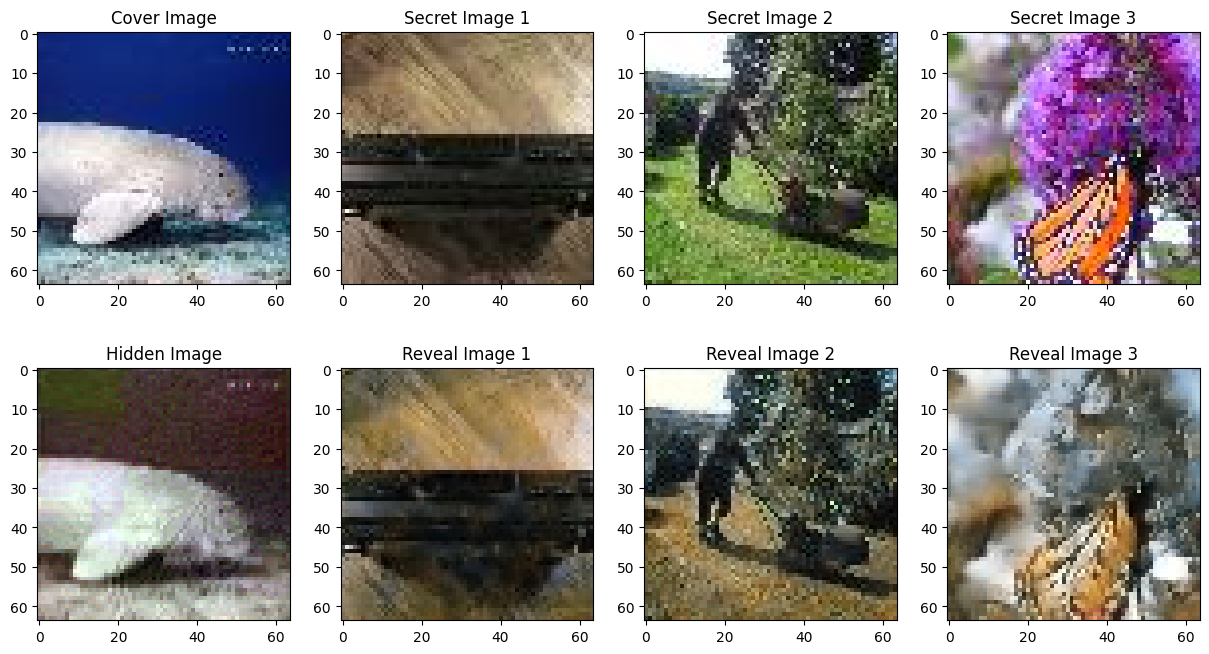

In [ ]:
plot(grids)

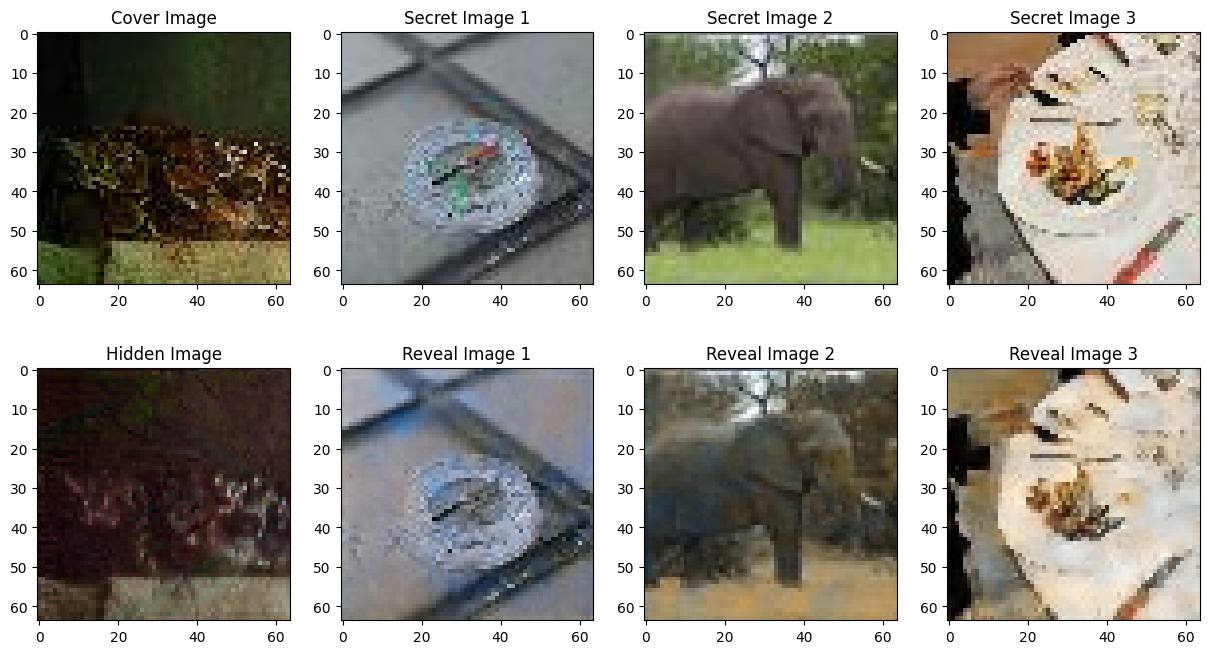

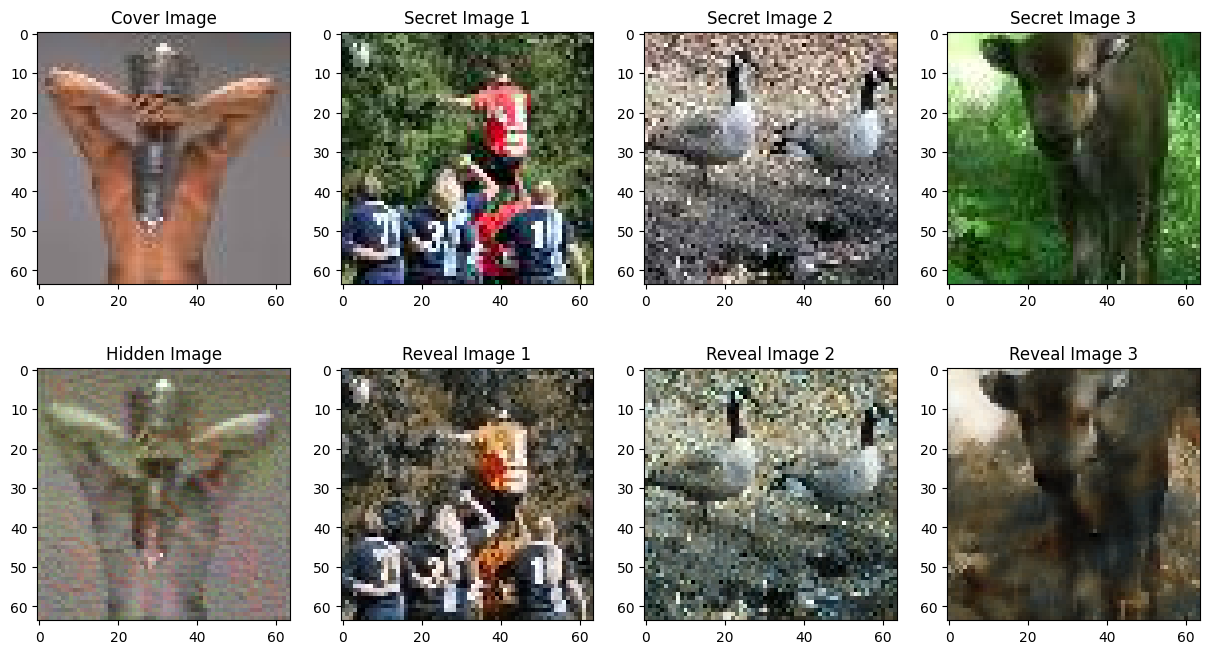

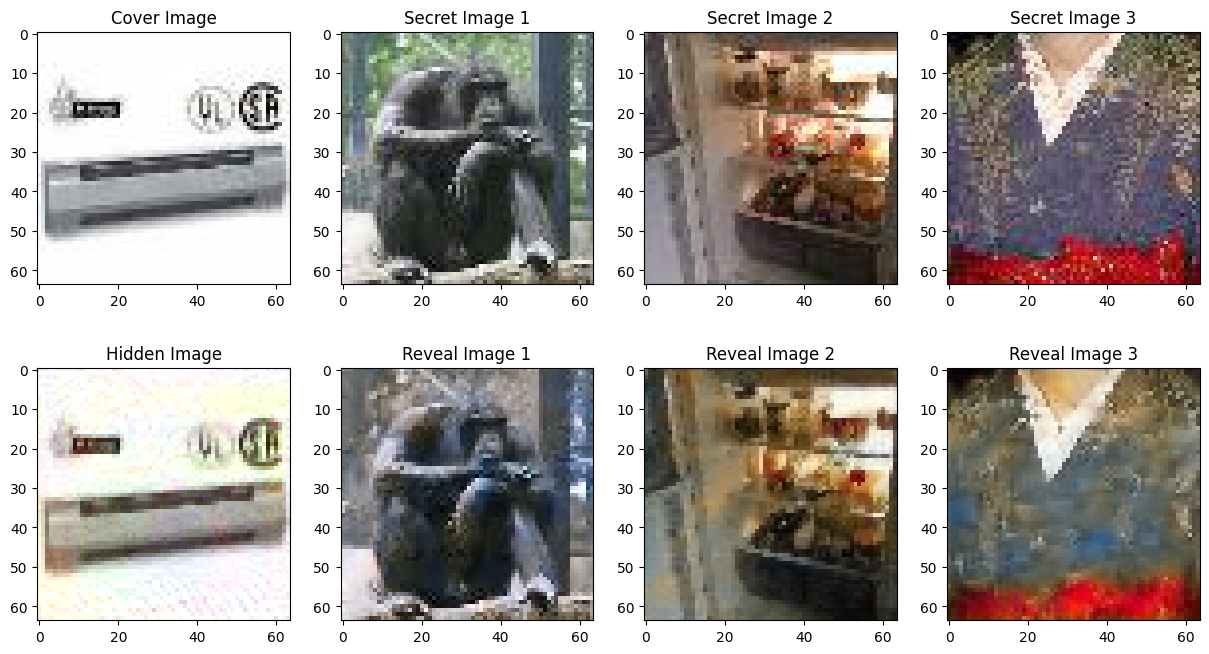

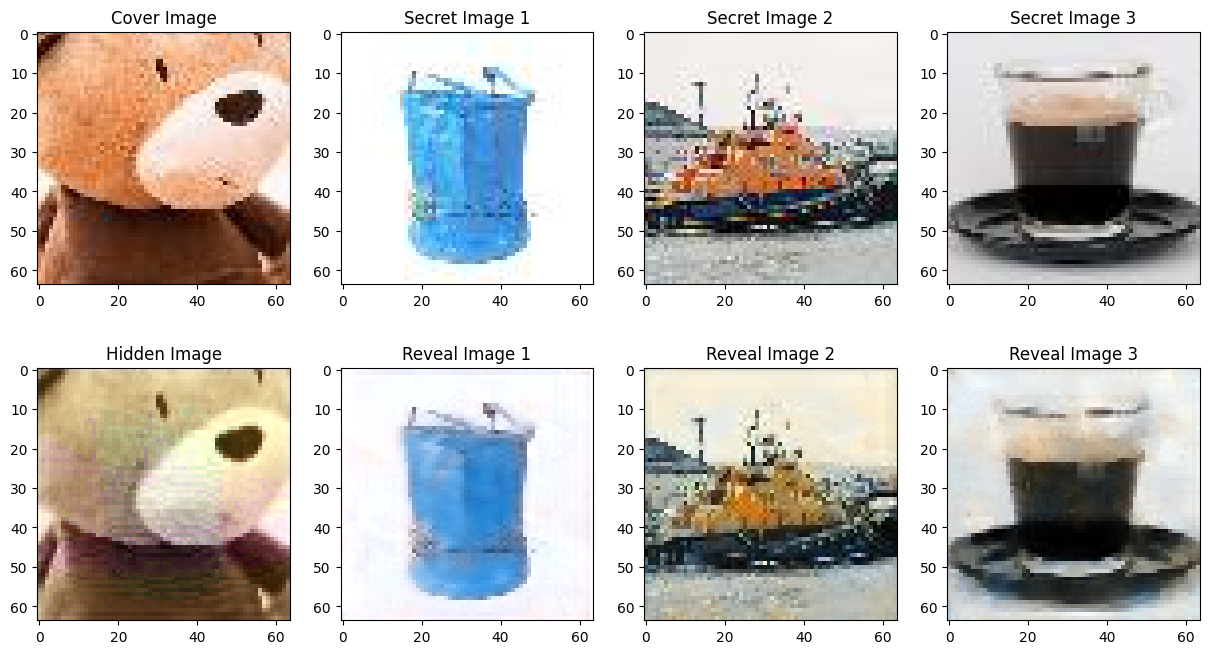

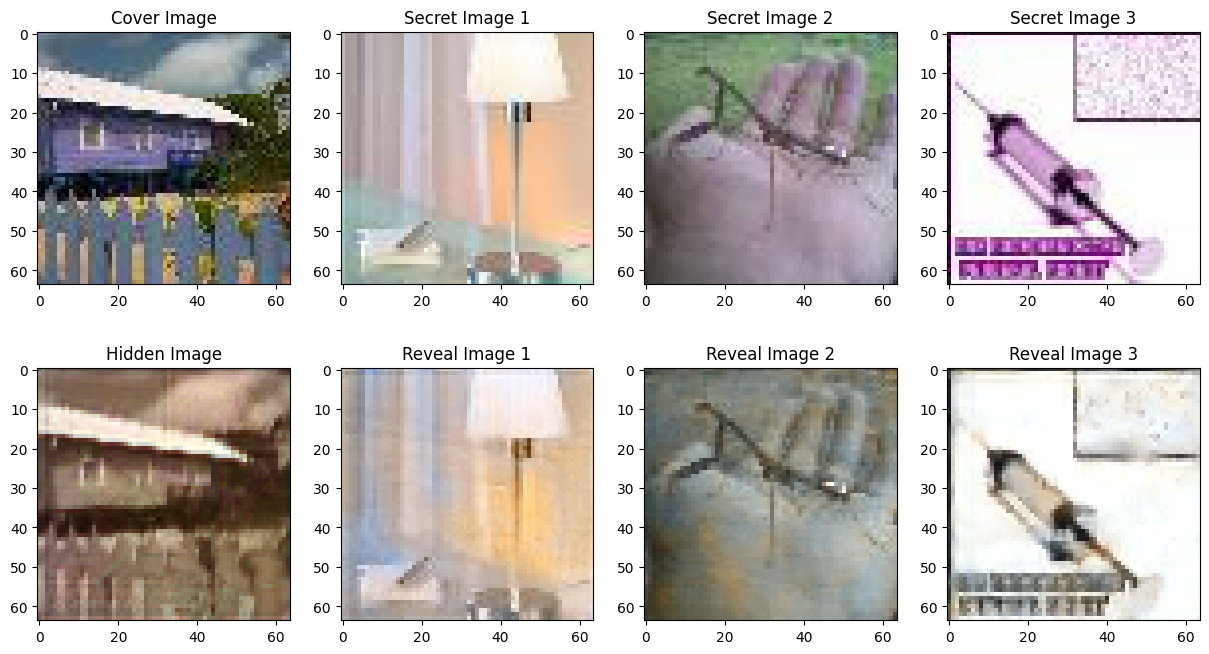

In [ ]:
for i in range(6):
    grids = predict(model,valid_data_loader)
    plot(grids)